In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_json('json/corpus.json')
df = df.reset_index().drop(columns = ['index'])

df.to_json('json/corpus.json')

In [3]:
df.head(1)

,track_id,title_billboard,artist_billboard,title_spotify,artist_spotify,root,time_signature,mode,tempo,loudness,duration_ms,energy,valence,genre_list,weeks_list,ranks_list,highest_rank,#weeks,year
0,5ayybTSXNwcarDtxQKqvWX,Poor Little Fool,Ricky Nelson,Poor Little Fool - Remastered,Ricky Nelson,0.0,4.0,1.0,154.999,-11.573,153933.0,0.332,0.795,"[adult standards, brill building pop, bubblegu...",[1958-08-08],[1],1,1.0,0


In [4]:
df = df[~df['valence'].isna()]

In [5]:
len(df)

14612

In [6]:
df['#weeks'] = 0

for ind, row in df.iterrows():
    df['#weeks'][ind] = len(row['weeks_list'])    

In [7]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style("ticks")
sns.set_context('notebook', font_scale=1.5)

In [8]:
df['#weeks'].value_counts().sort_index(
    ascending = True)

1      490
2      634
3      772
4      822
5      928
6     1038
7     1108
8     1049
9      921
10     892
11     826
12     813
13     701
14     608
15     555
16     421
17     387
18     421
19     364
20     226
21     156
22     120
23     104
24      66
25      66
26      30
27      25
28      20
29       4
30       4
31       7
32       5
33       3
34       2
35       4
36       3
37       5
38       3
39       2
40       2
41       2
42       2
53       1
Name: #weeks, dtype: int64

In [9]:
df['#weeks'].sum()

143969

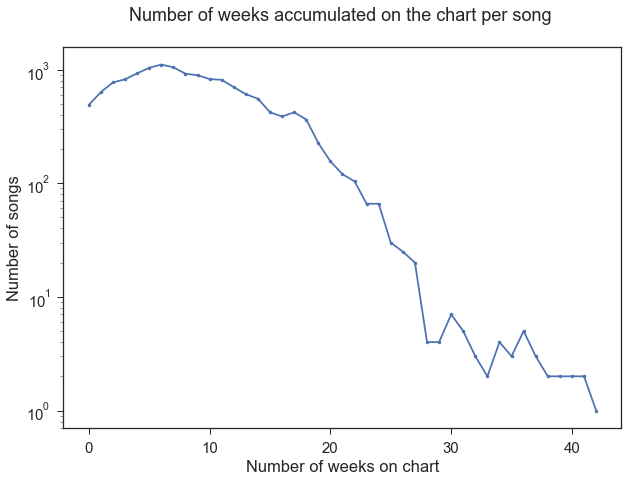

In [10]:
df_ = df['#weeks'].value_counts().sort_index(
    ascending = True).reset_index()['#weeks']
plt.semilogy(df_.index, df_.values, '.-')
plt.xlabel('Number of weeks on chart')
plt.ylabel('Number of songs')
plt.title('Number of weeks accumulated on the chart per song \n')
plt;

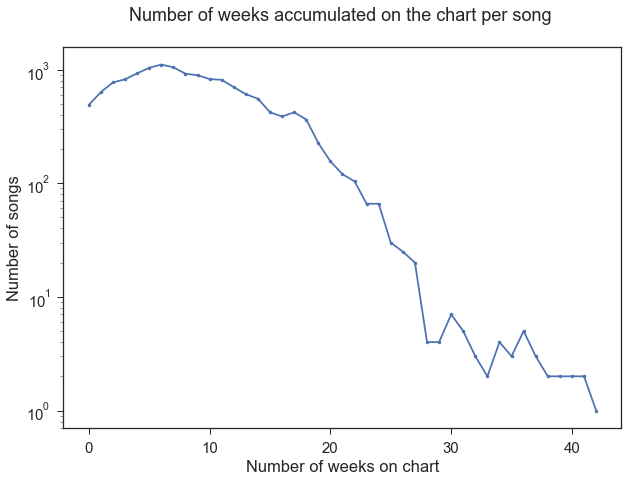

In [11]:
df_ = df['#weeks'].value_counts().sort_index(
    ascending = True).reset_index()['#weeks']
plt.semilogy(df_.index, df_.values, '.-')
plt.xlabel('Number of weeks on chart')
plt.ylabel('Number of songs')
plt.title('Number of weeks accumulated on the chart per song \n')
plt;

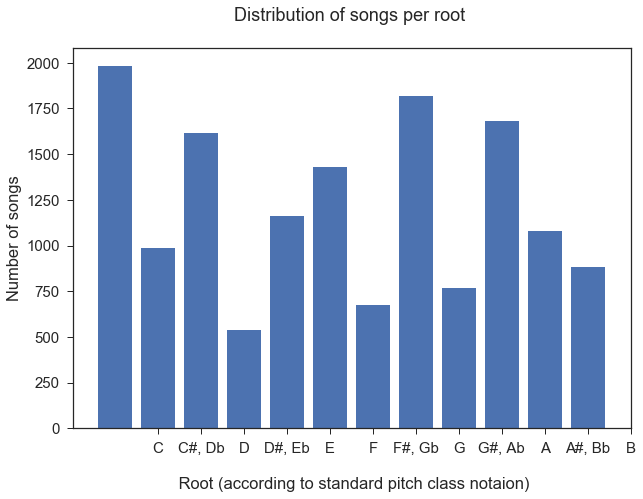

In [12]:
df_ = df['root'].value_counts().sort_index(
    ascending = True).reset_index()['root']
plt.bar(df_.index, df_.values)
plt.xlabel('\n Root (according to standard pitch class notaion)')

plt.xticks(np.arange(1, 13), ['C', 'C#, Db', 'D', 'D#, Eb', 'E', 'F', 'F#, Gb', 'G', 'G#, Ab', 'A',
                          'A#, Bb', 'B'])

plt.ylabel('Number of songs')
plt.title('Distribution of songs per root \n')
plt;

In [13]:
sns.set(rc={'figure.figsize':(5,7)})
sns.set_style("ticks")
sns.set_context('notebook', font_scale=1.5)

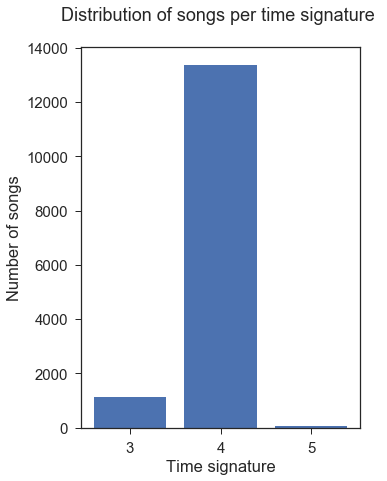

In [14]:
df_ = df[df['time_signature'] != -1]
df_ = df_[df_['time_signature'] != 1]
df_ = df_['time_signature'].value_counts().sort_index(
    ascending = True).reset_index()['time_signature']
plt.bar(df_.index, df_.values)
plt.xlabel('Time signature')

plt.xticks([0, 1, 2], [3, 4, 5])

plt.ylabel('Number of songs')
plt.title('Distribution of songs per time signature \n')
plt;

In [15]:
df_

0     1137
1    13357
2       51
Name: time_signature, dtype: int64

In [16]:
sns.set(rc={'figure.figsize':(3,7)})
sns.set_style("ticks")
sns.set_context('notebook', font_scale=1.5)

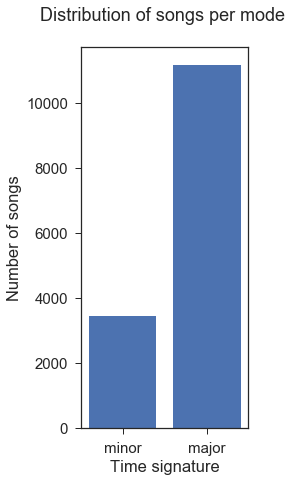

In [17]:
df_ = df[df['mode'] != -1]
df_ = df_['mode'].value_counts().sort_index(
    ascending = True).reset_index()['mode']
plt.bar(df_.index, df_.values)
plt.xlabel('Time signature')

plt.xticks([0, 1], ['minor', 'major'])

plt.ylabel('Number of songs')
plt.title('Distribution of songs per mode \n')
plt;

In [18]:
for col in df.columns:
    df[df[col] == -1.] = np.nan

In [19]:
df[['tempo', 'loudness', 'duration_ms', 'energy', 'valence']].describe()

,tempo,loudness,duration_ms,energy,valence
count,14612.000000,14612.000000,1.461200e+04,14612.000000,14612.000000
mean,119.712839,-10.151481,2.175498e+05,0.584263,0.654771
std,27.038439,3.407632,7.984550e+04,0.205235,0.232077
min,36.710000,-29.467000,4.732000e+04,0.015700,0.035900
25%,100.817500,-12.315250,1.621920e+05,0.434000,0.489000
50%,118.206000,-9.952500,2.045705e+05,0.589000,0.693000
75%,133.867250,-7.683000,2.547330e+05,0.743000,0.853000
max,241.009000,2.291000,3.079158e+06,0.997000,1.000000


In [20]:
df['mode'].value_counts()

1.0    11165
0.0     3447
Name: mode, dtype: int64

In [21]:
df['time_signature'].value_counts()

4.0    13357
3.0     1137
1.0       67
5.0       51
Name: time_signature, dtype: int64

In [22]:
df['year'] = 0

In [23]:
for ind, row in df.iterrows():
    df['year'][ind] 

In [24]:
df.head()

,track_id,title_billboard,artist_billboard,title_spotify,artist_spotify,root,time_signature,mode,tempo,loudness,duration_ms,energy,valence,genre_list,weeks_list,ranks_list,highest_rank,#weeks,year
0,5ayybTSXNwcarDtxQKqvWX,Poor Little Fool,Ricky Nelson,Poor Little Fool - Remastered,Ricky Nelson,0.0,4.0,1.0,154.999,-11.573,153933.0,0.332,0.795,"[adult standards, brill building pop, bubblegu...",[1958-08-08],[1],1,1.0,0
1,205EtD8tQnHDXMkmtYiaHF,Patricia,Perez Prado And His Orchestra,Patricia,Pérez Prado,1.0,4.0,1.0,137.396,-9.522,140867.0,0.638,0.837,"[bolero, cuban rumba, latin jazz, lounge, mamb...",[1958-08-08],[3],3,1.0,0
2,5B9SeOQHiyvheYaAfBq7ml,Walk In The Sun,Bruce Hornsby,Walk In The Sun - Remastered 2003,Bruce Hornsby,2.0,4.0,1.0,122.013,-7.338,282053.0,0.804,0.965,[nan],"[1995-08-22, 1995-09-01, 1995-09-08, 1995-09-1...","[58, , 58, , 57, , 54, , 59, , 64, ...",,8.0,0
3,74jTexO94dFGyXGyeu8krd,Beautiful Life,Ace Of Base,Beautiful Life,Ace of Base,0.0,4.0,0.0,135.015,-5.266,221187.0,0.988,0.749,"[bubblegum dance, dance pop, eurodance, europo...","[1995-11-08, 1995-11-15, 1995-11-22, 1995-12-0...","[30, , 22, , 20, , 20, , 16, , 15, ...",,7.0,0
5,0cJdSg34dnUSxSyFjBf703,Finger Poppin' Time,Hank Ballard And The Midnighters,Finger Poppin' Time,Hank Ballard & The Midnighters,0.0,4.0,1.0,78.009,-13.492,111827.0,0.591,0.686,"[doo-wop, rhythm and blues]","[1960-05-15, 1960-05-22, 1960-06-01, 1960-06-0...","[81, , 73, , 64, , 74, , 74, , 64, ...",,23.0,0


In [25]:
df_ = df[['mode', 'time_signature', 'tempo', 'loudness', 'duration_ms', 'energy', 'valence']]
df_ = df_[df_['mode'] != -1]
df_ = df_[df_['time_signature'] != -1]
df_ = df_.dropna()
len(df_)

14612

In [35]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style("ticks")
sns.set_context('notebook', font_scale=1.3)

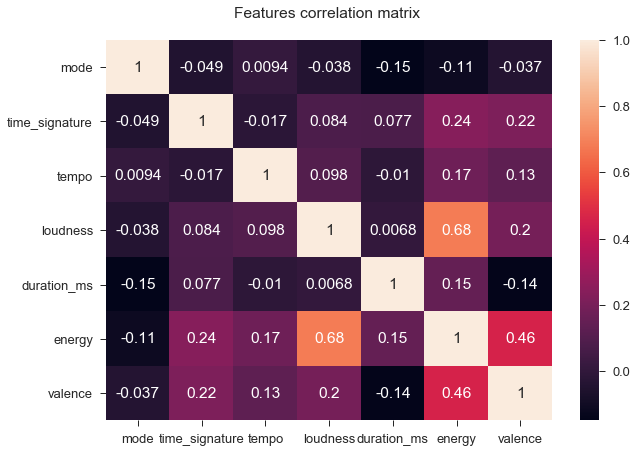

In [36]:
sns.heatmap(df_.corr(), annot=True).set_title('Features correlation matrix \n');

In [28]:
df.head(1)

,track_id,title_billboard,artist_billboard,title_spotify,artist_spotify,root,time_signature,mode,tempo,loudness,duration_ms,energy,valence,genre_list,weeks_list,ranks_list,highest_rank,#weeks,year
0,5ayybTSXNwcarDtxQKqvWX,Poor Little Fool,Ricky Nelson,Poor Little Fool - Remastered,Ricky Nelson,0.0,4.0,1.0,154.999,-11.573,153933.0,0.332,0.795,"[adult standards, brill building pop, bubblegu...",[1958-08-08],[1],1,1.0,0


In [29]:
years = []
for ind, item in df['weeks_list'].iteritems():
    years.append(int(item[0][:4]))

In [30]:
years = pd.Series(years).value_counts().sort_index()[1:]

In [37]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("ticks")
sns.set_context('notebook', font_scale=1.8)

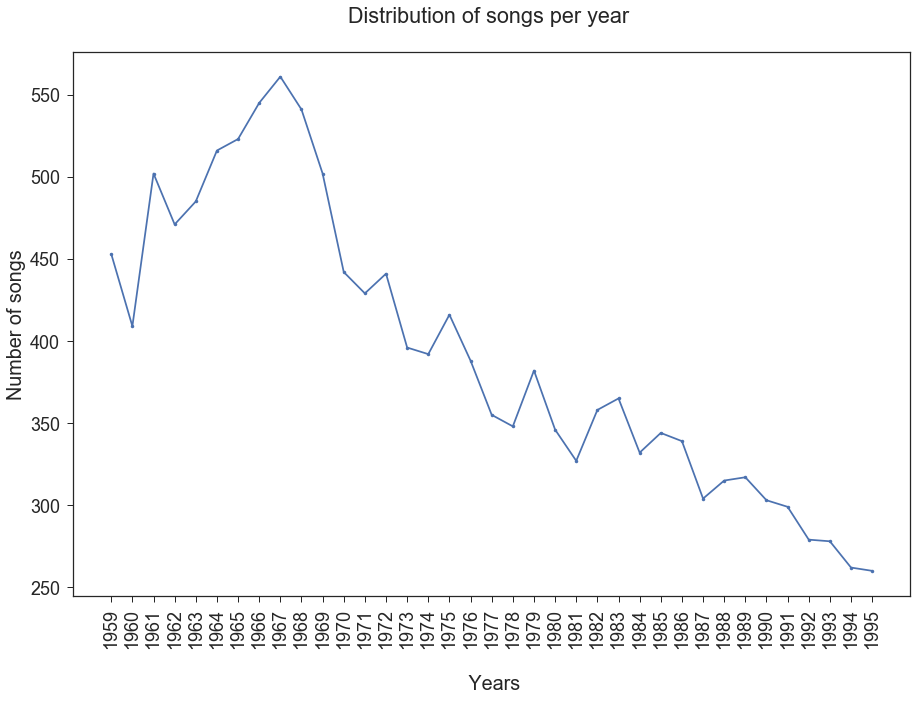

In [38]:
plt.plot(years.index, years.values, '.-')
plt.xlabel('\n Years')
plt.ylabel('Number of songs')
plt.title('Distribution of songs per year \n')
plt.xticks(np.arange(1959, 1996), np.arange(1959, 1996), rotation = '90')
plt;